<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/k2_pix_small.png">
*This notebook contains an excerpt instructional material from [gully](https://twitter.com/gully_) and the [K2 Guest Observer Office](https://keplerscience.arc.nasa.gov/); the content is available [on GitHub](https://github.com/gully/k2-metadata).*


<!--NAVIGATION-->
< [K2 Guest Observer Proposal Information](02.01-Guest-Observer-proposals-analysis.ipynb) | [Contents](Index.ipynb) | [Other K2 metadata sources](03.00-Other-metadata-sources.ipynb) >

# K2 target index fun

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
path = '../../k2-target-index/k2-target-pixel-files.csv.gz'

In [4]:
! du -hs ../../k2-target-index/k2-target-pixel-files.csv.gz

 65M	../../k2-target-index/k2-target-pixel-files.csv.gz


In [5]:
df = pd.read_csv(path)

In [6]:
df.shape

(425583, 43)

In [7]:
df.columns

Index(['filename', 'url', 'filesize', 'object', 'keplerid', 'obsmode',
       'campaign', 'data_rel', 'channel', 'module', 'output', 'ra_obj',
       'dec_obj', 'kepmag', 'cadences', 'lc_start', 'lc_end', 'gain',
       'readnois', 'meanblck', 'cdpp3_0', 'cdpp6_0', 'cdpp12_0', 'npix',
       'naxis1', 'naxis2', 'crpix1', 'crpix2', 'crval1', 'crval2', 'cdelt1',
       'cdelt2', 'pc1_1', 'pc1_2', 'pc2_1', 'pc2_2', 'crval1p', 'crval2p',
       'corners', 'ra_min', 'ra_max', 'dec_min', 'dec_max'],
      dtype='object')

In [8]:
df.iloc[100000:100005]

,filename,url,filesize,object,keplerid,obsmode,campaign,data_rel,channel,module,...,pc1_2,pc2_1,pc2_2,crval1p,crval2p,corners,ra_min,ra_max,dec_min,dec_max
100000,ktwo200148401-c12_lpd-targ.fits.gz,http://archive.stsci.edu/missions/k2/target_pi...,0.4,EPIC 200148401,200148401,long cadence,12,18,84,24,...,-0.814984,-0.814793,0.579487,868,676,"344.801371,-6.177698;344.802277,-6.177058;344....",344.801371,344.806789,-6.184003,-6.177058
100001,ktwo200148402-c12_lpd-targ.fits.gz,http://archive.stsci.edu/missions/k2/target_pi...,0.4,EPIC 200148402,200148402,long cadence,12,18,84,24,...,-0.814976,-0.814805,0.579500,853,677,"344.792619,-6.163602;344.793525,-6.162961;344....",344.792619,344.798036,-6.169906,-6.162961
100002,ktwo200148403-c12_lpd-targ.fits.gz,http://archive.stsci.edu/missions/k2/target_pi...,0.4,EPIC 200148403,200148403,long cadence,12,18,84,24,...,-0.814977,-0.814787,0.579499,868,677,"344.802284,-6.177111;344.803190,-6.176470;344....",344.802284,344.807702,-6.183415,-6.176470
100003,ktwo200148404-c12_lpd-targ.fits.gz,http://archive.stsci.edu/missions/k2/target_pi...,0.4,EPIC 200148404,200148404,long cadence,12,18,84,24,...,-0.814976,-0.814803,0.579502,853,678,"344.793524,-6.162961;344.794430,-6.162320;344....",344.793524,344.798942,-6.169265,-6.162320
100004,ktwo200148405-c12_lpd-targ.fits.gz,http://archive.stsci.edu/missions/k2/target_pi...,0.5,EPIC 200148405,200148405,long cadence,12,18,84,24,...,-0.815004,-0.814834,0.579442,868,678,"344.803109,-6.175919;344.804016,-6.175279;344....",344.803109,344.809172,-6.183125,-6.175279


In [9]:
df.campaign.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  91,  92, 101, 102,
       111, 112,  12,  13])

In [10]:
cad_df = df.groupby('campaign').cadences.describe()[['min', 'max']].rename(columns={'min':'long cadence','max':'short cadence'})

In [11]:
cad_df.stack()

campaign               
0         long cadence       3753.0
          short cadence    112590.0
1         long cadence       4022.0
          short cadence    120660.0
2         long cadence       3856.0
          short cadence    115680.0
3         long cadence       3386.0
          short cadence    101580.0
4         long cadence       3470.0
          short cadence    104100.0
5         long cadence       3663.0
          short cadence    109890.0
6         long cadence       3863.0
          short cadence    115890.0
7         long cadence       4043.0
          short cadence    121290.0
8         long cadence       3853.0
          short cadence    115590.0
12        long cadence       3862.0
          short cadence    115860.0
13        long cadence       3944.0
          short cadence    118320.0
91        long cadence       1290.0
          short cadence     38700.0
92        long cadence       2022.0
          short cadence     60660.0
101       long cadence        306.0
    

In [17]:
pix_df = df.groupby(['campaign', 'obsmode']).npix.sum()

In [18]:
count_df = df.groupby(['campaign', 'obsmode']).filename.count()

In [19]:
result = pd.concat([count_df, cad_df.stack(), pix_df], axis=1).rename(columns={0:'cadences',
                                                                               'filename':'N_targets'})

In [20]:
result

N_targets  cadences     npix
campaign obsmode                                    
0        long cadence        7902    3753.0  4959448
         short cadence         13  112590.0    17307
1        long cadence       21647    4022.0  5165005
         short cadence         56  120660.0    41944
2        long cadence       14805    3856.0  2177553
         short cadence         54  115680.0    23689
3        long cadence       16833    3386.0  2675034
         short cadence        216  101580.0    41653
4        long cadence       17107    3470.0  2488533
         short cadence        122  104100.0    37295
5        long cadence       25774    3663.0  2552587
         short cadence        204  109890.0    19180
6        long cadence       47550    3863.0  2653680
         short cadence         84  115890.0    27305
7        long cadence       15085    4043.0  1617516
         short cadence         72  121290.0    16071
8        long cadence       29939    3853.0  2263384
         short cadence         63  115590.0    41946
12       long cadence       45951    3862.0  2693553
         short cadence        234  115860.0    31338
13       long cadence       26169    3944.0  2050528
         short cadence        118  118320.0    42126
91       long cadence        3417    1290.0  3262614
         short cadence         12   38700.0     2656
92       long cadence        3550    2022.0  3268660
         short cadence         13   60660.0     2810
101      long cadence       41531     306.0  2869663
         short cadence        138    9180.0    32958
102      long cadence       41530     353.0  2869468
         short cadence        138  101520.0    32958
111      long cadence       32618    1141.0  1617472
         short cadence         67   34230.0    20505
112      long cadence       32506    2336.0  1597186
         short cadence         65   70080.0    20261

In [21]:
#result['tot_measurements'] =  result.cadences * result.N_targets
result['tot_pix'] =  result.cadences*result.npix

In [22]:
result

N_targets  cadences     npix       tot_pix
campaign obsmode                                                  
0        long cadence        7902    3753.0  4959448  1.861281e+10
         short cadence         13  112590.0    17307  1.948595e+09
1        long cadence       21647    4022.0  5165005  2.077365e+10
         short cadence         56  120660.0    41944  5.060963e+09
2        long cadence       14805    3856.0  2177553  8.396644e+09
         short cadence         54  115680.0    23689  2.740344e+09
3        long cadence       16833    3386.0  2675034  9.057665e+09
         short cadence        216  101580.0    41653  4.231112e+09
4        long cadence       17107    3470.0  2488533  8.635210e+09
         short cadence        122  104100.0    37295  3.882410e+09
5        long cadence       25774    3663.0  2552587  9.350126e+09
         short cadence        204  109890.0    19180  2.107690e+09
6        long cadence       47550    3863.0  2653680  1.025117e+10
         short cadence         84  115890.0    27305  3.164376e+09
7        long cadence       15085    4043.0  1617516  6.539617e+09
         short cadence         72  121290.0    16071  1.949252e+09
8        long cadence       29939    3853.0  2263384  8.720819e+09
         short cadence         63  115590.0    41946  4.848538e+09
12       long cadence       45951    3862.0  2693553  1.040250e+10
         short cadence        234  115860.0    31338  3.630821e+09
13       long cadence       26169    3944.0  2050528  8.087282e+09
         short cadence        118  118320.0    42126  4.984348e+09
91       long cadence        3417    1290.0  3262614  4.208772e+09
         short cadence         12   38700.0     2656  1.027872e+08
92       long cadence        3550    2022.0  3268660  6.609231e+09
         short cadence         13   60660.0     2810  1.704546e+08
101      long cadence       41531     306.0  2869663  8.781169e+08
         short cadence        138    9180.0    32958  3.025544e+08
102      long cadence       41530     353.0  2869468  1.012922e+09
         short cadence        138  101520.0    32958  3.345896e+09
111      long cadence       32618    1141.0  1617472  1.845536e+09
         short cadence         67   34230.0    20505  7.018862e+08
112      long cadence       32506    2336.0  1597186  3.731026e+09
         short cadence         65   70080.0    20261  1.419891e+09

In [23]:
result.tot_pix.sum()

181705010785.0

# K2 has downloaded 181,705,010,785.0
"181 Trillion pixels"

In [25]:
sc_ratio = result.xs('short cadence', level='obsmode').tot_pix/(
    result.xs('long cadence', level='obsmode').tot_pix + result.xs('short cadence', level='obsmode').tot_pix)

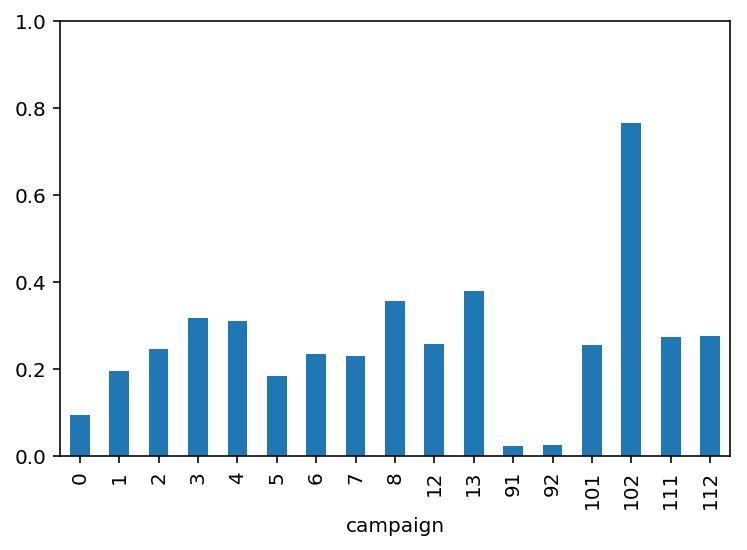

In [26]:
sc_ratio.plot('bar')
plt.ylim(0,1);

<!--NAVIGATION-->
< [K2 Guest Observer Proposal Information](02.01-Guest-Observer-proposals-analysis.ipynb) | [Contents](Index.ipynb) | [Other K2 metadata sources](03.00-Other-metadata-sources.ipynb) >